<a href="https://colab.research.google.com/github/filipbyberg/Age-Gender-Mood-classification-CNN/blob/main/Train_mood_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plan

- CK+ Dataset images are stored in separate folders, named basis their emotion labels:
  - 0 = 'anger', 1 = 'contempt', 2 = 'disgust', 3 = 'fear', 4 = 'happy', 5 = 'sadness', 6 = 'surprise'
Convert all images to grayscale

- Define emotion labels basis use case

- Using 50 epochs on our defined CNN Architecture, comprising of:

  - an input Conv2D layer (with 32 filters) paired with an MaxPooling2D layer,
  - 3 pairs of Conv2D (with 64, 128 & 256 filters) and MaxPooling2D layers,
  - 1 Dense layer with 128 nodes, and
  - an output Dense layer with 3 nodes.

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Machine_learning_Project/Input_Output_Mood
!ls

/content/drive/My Drive/Machine_learning_Project/Input_Output_Mood
Input  Output


# Import Libraties/ Functions

All essential libraries and functions to be used in the project have been imported.

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

# Import Dataset

Importing CK+ Dataset with emotion labels.

In [ ]:
dataset_folder='./Input/CK+48'
sub_folders=os.listdir(dataset_folder)

sub_folders

['happy', 'sadness', 'disgust', 'anger', 'fear', 'contempt', 'surprise']

Combining images and labels in the same folder and defining emotion labels basis use case.

We are using positive:0, negative:1, neutral:2

label in ['happy', 'surprise'] changed to label = positive emotion.


label in ['anger','sadness'] changed to label = negative emotion.

label in ['contempt', 'disgust', 'fear'] changed to label = neutral emotion.

In [ ]:
# Reading folder names as labels and images underneath
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

# reading folders in the main dataset folder, one at a time
for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index

  # Define labels basis use case.
  if  label in [4, 6]:
    new_label=0
  elif label in [0,5]:
    new_label=1
  else:
    new_label=2


  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  # reading images in the sub folder, one at a time
  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(new_label))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(new_label)
    i+=1
  last.append(i)

./Input/CK+48/happy/S010_006_00000015.png	1
./Input/CK+48/happy/S026_006_00000011.png	1
./Input/CK+48/happy/S014_005_00000015.png	1
./Input/CK+48/happy/S011_006_00000013.png	1
./Input/CK+48/happy/S014_005_00000017.png	1
./Input/CK+48/happy/S011_006_00000011.png	1
./Input/CK+48/happy/S010_006_00000013.png	1
./Input/CK+48/happy/S014_005_00000016.png	1
./Input/CK+48/happy/S011_006_00000012.png	1
./Input/CK+48/happy/S010_006_00000014.png	1
./Input/CK+48/happy/S034_005_00000010.png	1
./Input/CK+48/happy/S026_006_00000013.png	1
./Input/CK+48/happy/S034_005_00000009.png	1
./Input/CK+48/happy/S037_006_00000019.png	1
./Input/CK+48/happy/S035_006_00000016.png	1
./Input/CK+48/happy/S026_006_00000012.png	1
./Input/CK+48/happy/S035_006_00000017.png	1
./Input/CK+48/happy/S032_006_00000014.png	1
./Input/CK+48/happy/S032_006_00000015.png	1
./Input/CK+48/happy/S034_005_00000008.png	1
./Input/CK+48/happy/S032_006_00000016.png	1
./Input/CK+48/happy/S044_003_00000013.png	1
./Input/CK+48/happy/S037_006_000

In [ ]:
images_x = np.array(images)
labels_y = np.array(labels)

# we divide image pixels by 255 to reduce computation power
images_x = images_x/255

In [ ]:
images_x.shape

(981, 48, 48)

encoding the labels

In [ ]:
num_of_classes = 3
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

# Split into Train / Test

The dataset is divided into two as 75% training and 25% testing.

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)

In [ ]:
len(X_train)

735

In [ ]:
len(X_test)

246

# Define CNN Architecture

(#1) An input Conv2D layer (with 32 filters) paired with an MaxPooling2D layer,

(#2) 3 pairs of Conv2D (with 64, 128 & 256 filters) and MaxPooling2D layers,

(#3) 1 Dense layer with 128 nodes,

(#4) An output Dense layer with 3 nodes.

In [ ]:
input = Input(shape = (48,48,1))

#1
conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

#2
conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

#3
dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

#4
output = Dense(3,activation="sigmoid")(drop_1)

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

# Model Training

In [ ]:
fle_s='./Output/emotion_model.h5'
checkpoints = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpoints]

In [ ]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50,callbacks=[callback_list])

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 1.3376 - accuracy: 0.3551
Epoch 1: loss improved from inf to 1.33759, saving model to ./Output/emotion_model.h5
23/23 [==============================] - 8s 309ms/step - loss: 1.3376 - accuracy: 0.3551 - val_loss: 1.2576 - val_accuracy: 0.4268
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 1.2082 - accuracy: 0.4503
Epoch 2: loss improved from 1.33759 to 1.20825, saving model to ./Output/emotion_model.h5
23/23 [==============================] - 6s 263ms/step - loss: 1.2082 - accuracy: 0.4503 - val_loss: 1.1190 - val_accuracy: 0.5650
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 0.8445 - accuracy: 0.6707
Epoch 3: loss improved from 1.20825 to 0.84447, saving model to ./Output/emotion_model.h5
23/23 [==============================] - 6s 266ms/step - loss: 0.8445 - accuracy: 0.6707 - val_loss: 0.6300 - val_accuracy: 0.7805
Epoch 4/50
23/23 [==============================] - ETA: 0s

# Model Performance

Checking the train and test loss and accuracy values from the neural network.

In [ ]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Plotting a line chart to visualize the loss and accuracy values by epochs.

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

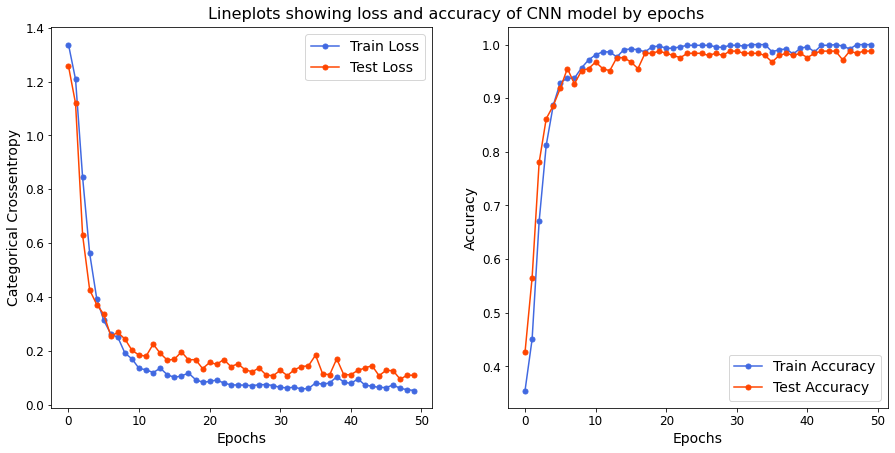

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)